In [1]:
from legal_backend.r_to_py.r_to_py import init_R
from legal_backend.bartCause.bart_cause import BARTCause
from legal_backend.pip_utils import prepare_train_data, rmse, nrmse, r_square, coverage_rate, kfold_indices, prepare_permute_data, statistic

import pandas as pd
import numpy as np
from sklearn import preprocessing

from scipy.stats import permutation_test
from matplotlib import pyplot as plt
from scipy import stats
from collections import Counter



In [2]:
init_R()

### Infer Law Effect

In [3]:
#load csv files and load possible laws
df = pd.read_csv('data/naloxone_clean.csv')

In [4]:
df.rename(columns={'death-rate-2013-2016':'delta_death_rate'}, inplace=True)
df['Urbanicity'] = df['Urbanicity'].map({'Urban':1, 'Rural':0})
df.columns

Index(['Percent-of-Population-Under-15-(2013-2017)',
       'Percent-of-Population-Aged-15-to-64-(2013-2017)',
       'Percent-of-Population-65+-(2013-2017)',
       'Percent-of-Population-White-(non-Hispanic)-(2013-2017)',
       'Percent-of-Populaiton-Black-(non-Hispanic)-(2013-2017)',
       'Percent-of-Population-Hispanic-or-Latino-(2013-2017)',
       'Percent-of-Population-Asian-(non-Hispanic)-(2013-2017)',
       'Percent-of-Population-Native-American/Alaska-Native-(non-Hispanic)-(2013-2017)',
       'Percent-of-Population-Native-Hawaiian/Pacific-Islander-(2013-2017)',
       'Percent-of-Population-Aged-25+-who-Have-at-Least-a-High-School-Diploma-(2013-2017)',
       'Percent-of-Population-Aged-25+-who-Have-a-Bachelor's-Degree-or-More-(2013-2017)',
       'Poverty-Rate-(2013-2017)', 'Median-Household-Income-(2013-2017)',
       'Unemployment-Rate-(2013-2017)',
       'Percent-of-Residents-with-a-Disability-(Aged-18-64)-(2013-2017)',
       'Percent-of-Popualtion-Employed-in-Mini

### Negative Patterns

In [5]:
df_sub = df.copy(deep=True)
"df_sub['Urbanicity']==1"
"df_sub['Percent-of-Population-Under-15-(2013-2017)']>0.216"
"df_sub['Percent-of-Popualtion-Employed-in-Mining-and-Natural-Resources-(2013-2017)']<0.009"
"df_sub['Unemployment-Rate-(2013-2017)']<0.048"
# df_sub = df_sub[df_sub['Percent-of-Population-Aged-25+-who-Have-a-Bachelor\'s-Degree-or-More-(2013-2017)']>0.221].reset_index(drop=True)
# df_sub = df_sub[df_sub['Percent-of-Residents-with-a-Disability-(Aged-18-64)-(2013-2017)']<0.116].reset_index(drop=TErue)
"df_sub['Percent-of-Population-Aged-15-to-64-(2013-2017)']>0.631"
"df_sub['Percent-of-Population-Native-Hawaiian/Pacific-Islander-(2013-2017)']<0.001"
"df_sub['Number-of-Mental-Health-Facilities-(As-of-March-2023)']>2"
"df_sub['Economic-Risk-Score']==2"
"df_sub['Percent-of-Population-Native-American/Alaska-Native-(non-Hispanic)-(2013-2017)']<0.002"
"df_sub['Percent-of-Populaiton-Black-(non-Hispanic)-(2013-2017)']<0.004"
"df_sub['Number-of-Substance-Use-Facilities-(As-of-March-2023)']>2"
"df_sub['MDsPerCapita']>9.17"

"df_sub['MDsPerCapita']>9.17"

In [6]:
conds = []
# conds.append("df_sub['Percent-of-Population-Under-15-(2013-2017)']>0.216")
# conds.append("df_sub['Number-of-Mental-Health-Facilities-(As-of-March-2023)']==0")
for cond in conds:
    df_sub = df_sub.loc[eval(cond)].reset_index(drop=True)
law = 'naimmcrimprolpyn'

In [7]:
print(law)
print(df_sub.shape[0])
df_sub.head()

naimmcrimprolpyn
1165


,Percent-of-Population-Under-15-(2013-2017),Percent-of-Population-Aged-15-to-64-(2013-2017),Percent-of-Population-65+-(2013-2017),Percent-of-Population-White-(non-Hispanic)-(2013-2017),Percent-of-Populaiton-Black-(non-Hispanic)-(2013-2017),Percent-of-Population-Hispanic-or-Latino-(2013-2017),Percent-of-Population-Asian-(non-Hispanic)-(2013-2017),Percent-of-Population-Native-American/Alaska-Native-(non-Hispanic)-(2013-2017),Percent-of-Population-Native-Hawaiian/Pacific-Islander-(2013-2017),Percent-of-Population-Aged-25+-who-Have-at-Least-a-High-School-Diploma-(2013-2017),...,pharmacist-dispensing-method_Pharmacist prescriptive authority,pharmacist-dispensing-method_Directly authorized by legislature,naimmcrimprolpyn,nanapimm3yn,narcimm3yn,naimmcivlialpyn,nanapimm4yn,narcimm4yn,naloxone-crimpossesion,crim-possess-reasonable
0,0.2040,0.6562,0.1398,0.7568,0.1837,0.0257,0.0081,0.0041,0.0001,0.8758,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.1830,0.6298,0.1871,0.8318,0.0923,0.0437,0.0066,0.0062,0.0000,0.9003,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.1702,0.6809,0.1489,0.7477,0.2121,0.0222,0.0006,0.0036,0.0000,0.8070,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.1942,0.6339,0.1719,0.8766,0.0156,0.0873,0.0016,0.0030,0.0000,0.8003,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.1813,0.6594,0.1593,0.7300,0.2033,0.0344,0.0093,0.0020,0.0001,0.8234,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [8]:
print(Counter(df_sub[law]))
num_instances = list(Counter(df_sub[law]).values())
imbalance_ratio = min(num_instances) / max(num_instances)
print("Imbalanced Data Detected! Imbalnce Ratio:", imbalance_ratio) if (imbalance_ratio < 0.1) else None

Counter({1.0: 826, 0.0: 339})


In [9]:
X_train_scaled, y_train, Z_train, X_test_scaled, y_test, Z_test = prepare_train_data(df_sub, law)

In [10]:
bart_eval = BARTCause()
bart_eval.fit(X_train_scaled, y_train, Z_train, n_samples=1000,  n_burn=200,  n_chains=5)

In [11]:
# evaluate BART fit on response surface
newData = np.concatenate((X_test_scaled, Z_test), axis=1)

y_test_predicted_, y_test_predicted_lb, y_test_predicted_ub = bart_eval.predict(newData, infer_type="mu")

# y_test_predicted_ = bart_eval.predict(newData, infer_type="mu")
y_test_predicted = y_test_predicted_[:,np.newaxis]
y_test_predicted_lb = y_test_predicted_lb[:,np.newaxis]
y_test_predicted_ub = y_test_predicted_ub[:,np.newaxis]

In [12]:
print("quantile(0.05-0.95): [",np.quantile(y_test, 0.05),",", np.quantile(y_test, 0.95),"]")
print("BART RMS:", rmse(y_test,y_test_predicted),"\n", "Baseline RMS:", rmse(y_test,y_test.mean()))
print("r square:", r_square(y_test,y_test_predicted), "\n", "nrmse:", nrmse(y_test, y_test_predicted, 'range'))
print("coverage rate:", coverage_rate(y_test, y_test_predicted_lb, y_test_predicted_ub))

quantile(0.05-0.95): [ 12.386944352621722 , 106.56757355427986 ]
BART RMS: 32.07835938790918 
 Baseline RMS: 39.47300996271289
r square: 0.3395745376411261 
 nrmse: 0.09279962033347151
coverage rate: 0.6781115879828327


In [13]:
print("quantile(0.05-0.95): [ 12.386944352621722 , 106.56757355427986 ]\
\nBART RMS: 32.095347818261914 \
 \nBaseline RMS: 39.47300996271289\
\nr square: 0.33887484083084385 \
 \nnrmse: 0.09284876623484793\
\ncoverage rate: 0.6738197424892703")

quantile(0.05-0.95): [ 12.386944352621722 , 106.56757355427986 ]
BART RMS: 32.095347818261914  
Baseline RMS: 39.47300996271289
r square: 0.33887484083084385  
nrmse: 0.09284876623484793
coverage rate: 0.6738197424892703


#### K-fold Cross Validation

In [14]:
fold_indices = kfold_indices(df_sub, 5)

In [15]:
def cross_validation_test(df, law, fold_indices):
    bartCause = BARTCause()
    
    X_df = df.iloc[:, :27].to_numpy()
    M = X_df.shape[1] 

    y = df[['delta_death_rate']].to_numpy()
    Z_law = df[[law]].to_numpy()
    # numerical columns
    num_cols = [c for c in range(M) if len(np.unique(X_df[:, c])) > 2] 

    scores = []

    for fold, (train_indices, test_indices) in enumerate(fold_indices):
        print("fold:",fold)
        X_train, y_train, Z_train = X_df[train_indices,:], y[train_indices,:], Z_law[train_indices,:]
        X_test, y_test, Z_test = X_df[test_indices,:], y[test_indices,:], Z_law[test_indices,:]

        # standardize data
        scaler_ = preprocessing.StandardScaler().fit(X_train[:,num_cols])
        X_train_scaled = np.copy(X_train)
        X_train_scaled[:,num_cols] = scaler_.transform(X_train[:,num_cols])

        X_test_scaled = np.copy(X_test)
        X_test_scaled[:,num_cols] = scaler_.transform(X_test[:,num_cols])
        
        # Train the model on the training data
        bartCause.fit(X_train_scaled, y_train, Z_train, n_samples=1000,  n_burn=200,  n_chains=5)

        # Make predictions on the test data
        test_data = np.concatenate((X_test_scaled, Z_test), axis=1)
        y_test_pred_, _, _ = bartCause.predict(test_data, infer_type="mu")
        y_test_pred = y_test_pred_[:,np.newaxis]
        
        # Calculate the accuracy score for this fold
        fold_score = nrmse(y_test, y_test_pred, 'range')
        
        # Append the fold score to the list of scores
        scores.append(fold_score)

    # Calculate the mean accuracy across all folds
    mean_score = np.mean(scores)

    return scores, mean_score

In [16]:
scores, mean_score = cross_validation_test(df_sub, law, fold_indices)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Score:", mean_score)

fold: 0
fold: 1
fold: 2
fold: 3
fold: 4
K-Fold Cross-Validation Scores: [0.19285208191526448, 0.1484441444861633, 0.1266077816514192, 0.16406493518142773, 0.10890729019458405]
Mean Score: 0.14817524668577173


#### Permutation Test

In [17]:
bartCause = BARTCause()
X_scaled, y, Z_law = prepare_permute_data(df_sub, law)
bartCause.fit(X_scaled, y, Z_law, n_samples=1000,  n_burn=200,  n_chains=5)

In [18]:
# evaluate BART fit on response surface
newData = np.concatenate((X_scaled, Z_law), axis=1)

predicted_Z1, _, _ = bartCause.predict(newData, infer_type="mu.1")
predicted_Z0, _, _ = bartCause.predict(newData, infer_type="mu.0")
# predicted_Z1 = predicted_Z1_[:,np.newaxis]
# predicted_Z0 = predicted_Z0_[:,np.newaxis]
mean_law0 = predicted_Z0.mean()
mean_law1 = predicted_Z1.mean()
avg_ite = (predicted_Z1 - predicted_Z0).mean()
std_ite = (predicted_Z1 - predicted_Z0).std()
print("Avg ITE:", avg_ite,"Stdev ITE:",std_ite)

Avg ITE: -2.070272739875392 Stdev ITE: 5.519287996541065


In [19]:
alternative_str = 'less' if avg_ite > 0 else 'greater'

#### Permutation test

In [20]:
res_permute = permutation_test((predicted_Z0, predicted_Z1), statistic, alternative=alternative_str)
res_permute

PermutationTestResult(statistic=2.070272739875392, pvalue=0.0107, null_distribution=array([ 0.3317069 , -0.61342878, -0.22930458, ...,  2.21644478,
        0.00344204, -1.23888597]))

#### Paired Samples t-Test (Dependent Samples t-Test)

In [21]:
res_ttest = stats.ttest_rel(predicted_Z0, predicted_Z1, alternative=alternative_str)
res_ttest

TtestResult(statistic=12.797377988604788, pvalue=1.76302679596526e-35, df=1164)

#### Mann-Whitney U Test / Wilcoxon Rank-Sum Test (No normal distribution assumption)

In [22]:
res_mannwhitneyu = stats.mannwhitneyu(predicted_Z0, predicted_Z1, alternative=alternative_str)
res_mannwhitneyu

MannwhitneyuResult(statistic=732693.0, pvalue=0.00043320246566550224)

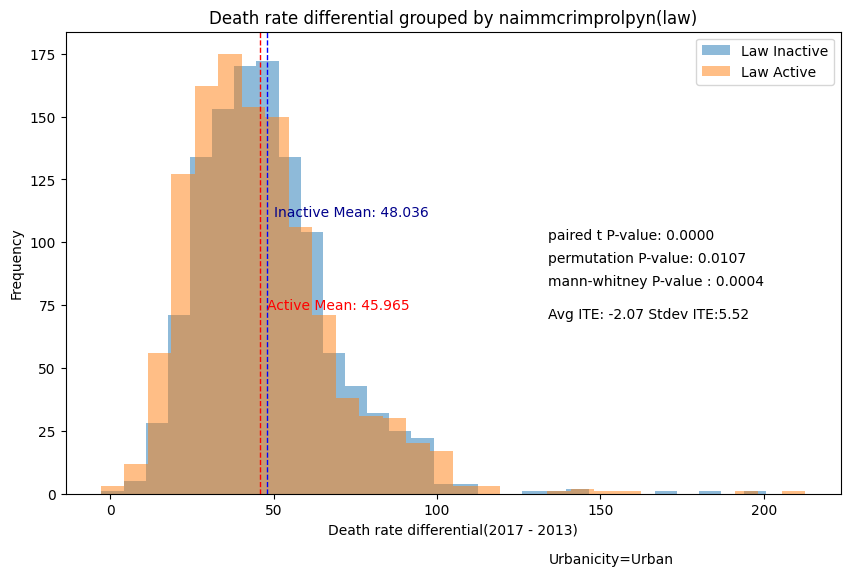

In [23]:

plt.figure(figsize=(10, 6))
plt.hist(predicted_Z0, bins=30, alpha=0.5, label='Law Inactive')
plt.hist(predicted_Z1, bins=30, alpha=0.5, label='Law Active')

plt.axvline(mean_law0, color='blue', linestyle='dashed', linewidth=1)
plt.text(mean_law0 + 2, plt.ylim()[1] * 0.6, f'Inactive Mean: {mean_law0:.3f}', color='darkblue')
plt.axvline(mean_law1, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_law1 + 2, plt.ylim()[1] * 0.4, f'Active Mean: {mean_law1:.3f}', color='red')

plt.text(plt.xlim()[1]*0.6, plt.ylim()[1] * 0.45, f'mann-whitney P-value : {res_mannwhitneyu.pvalue:.4f}', color='black')
plt.text(plt.xlim()[1]*0.6, plt.ylim()[1] * 0.5, f'permutation P-value: {res_permute.pvalue:.4f}', color='black')
plt.text(plt.xlim()[1]*0.6, plt.ylim()[1] * 0.55, f'paired t P-value: {res_ttest.pvalue:.4f}', color='black')
plt.text(plt.xlim()[1]*0.6, plt.ylim()[1] * 0.38, f'Avg ITE: {avg_ite:.2f} Stdev ITE:{std_ite:.2f}', color='black', fontsize=10)

plt.text(plt.xlim()[1]*0.6, plt.ylim()[1] * -0.15, 'Urbanicity=Urban', color='black')
if len(conds) > 0:
    for i,cond in enumerate(conds):
        cond_text = cond[6:] 
        plt.text(plt.xlim()[1]*0.6, plt.ylim()[1] * -0.2 -3.5 * i, cond_text, color='black')


plt.xlabel('Death rate differential(2017 - 2013)')
plt.ylabel('Frequency')
plt.title('Death rate differential grouped by '+ law+'(law)')
plt.legend()
# plt.savefig("demo_res/sub_law_"+law+".png")
plt.show()